### 예측

X: 입력데이터, 독립변수(independent variable), 특징(feature), 설명변수(explanatory variable)

Y: 출력데이터, 종속변수(dependent variable), label, class

### 에측을 하기 위한 방법론
1. 규칙기반(rule-based): 세부적인 규칙을 알려주는 방법
2. 학습기반(train-based) or 데이터기반(data-based): 규칙을 알려주지 않고 많은 데이터로 스스로 규칙을 찾도록 하는 방법

### 지도학습
학습용 데이터 집합: 정답이 표시된 수백 개의 문제들을 모아둔 것

지도학습: 컴퓨터에게 문제를 학습시키는 것, 지도학습이 얼마나 잘 되는가는 학습용 데이터의 양과 질에 크게 의존

target: 정답, 출력데이터

labelling: 입력데이터만 주어져있고 사람이 직접 출력데이터를 입력하는 작업

### 전처리와 인코딩
전처리: 출력데이터의 결정에 영향을 미칠만한 입력데이터의 처리 과정

인코딩: 한 예로 이미지 데이터를 숫자 형태로 바꾸는 과정

### 인코딩: 이미지 데이터

c:\Users\ghckd\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ghckd\anaconda\lib\site-pa

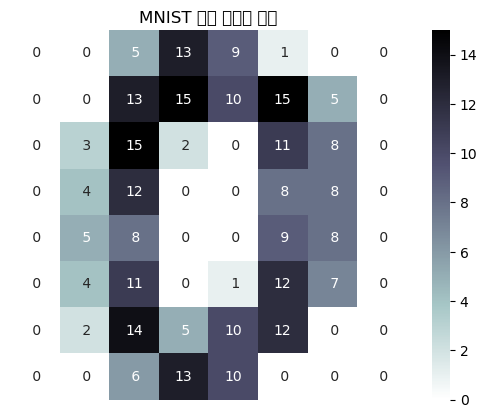

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()
sns.heatmap(digits.images[0], cmap=mpl.cm.bone_r, annot=True, fmt='2.0f', cbar=True, xticklabels=False, yticklabels=False)
plt.title('MNIST 숫자 이미지 표본')
plt.show()

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

이미지 데이터의 경우 이와 같은 숫자 형태의 행렬로 나타나며 아래의 숫자 벡터로 바뀌어 예측 모형에 입력된다.

In [3]:
digits.images[0].flatten()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### 입력 차원
입력 차원(input dimension): 입력의 개수, 입력 차원은 정해지면 바꿀 수 없고 고정되어야함

### 인코딩: 문서 데이터
문서 데이터를 숫자로 변환할 때의 단점: 이미지 데이터 즉 영상과는 달리 크기가 제각각이라는 점

* BOW(Bag Of Words): 

    문서 데이터를 고정된 크기의 숫자 벡터로 바꾸는 방법

    문서를 이루는 단어의 순서, 의미 등의 정보를 모두 무시하고 특정 단어가 몇 번 나왔는지만 세어 그 빈도를 벡터로 표시

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

news = fetch_20newsgroups()
print('입력:\n', news.data[0])
print('출력:\n', news.target_names[news.target[0]])

입력:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





출력:
 rec.autos


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english').fit(news.data[:100])
data = vec.transform(news.data[:100])
data.shape

(100, 6288)

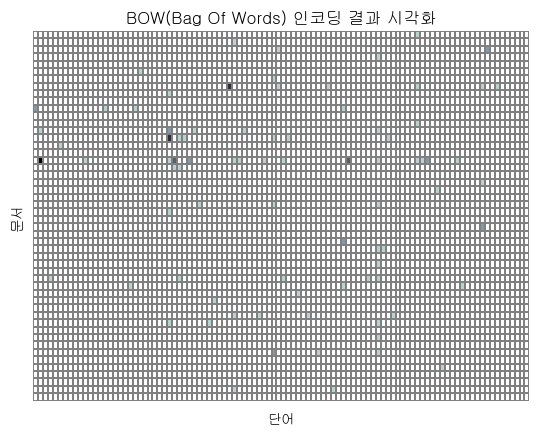

In [6]:
sns.heatmap(data.toarray()[:50, :100], cmap=mpl.cm.bone_r, linewidths=0.003, linecolor='gray', cbar=False, xticklabels=False, yticklabels=False)
plt.xlabel("단어")
plt.ylabel("문서")
plt.title("BOW(Bag Of Words) 인코딩 결과 시각화")
plt.show()

### 카테고리값

### 회귀분석과 분류: 예측
출력데이터가 숫자인 경우: 회귀분석

출력데이터가 카테고리값인 경우: 분류

#### 회귀분석

c:\Users\ghckd\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

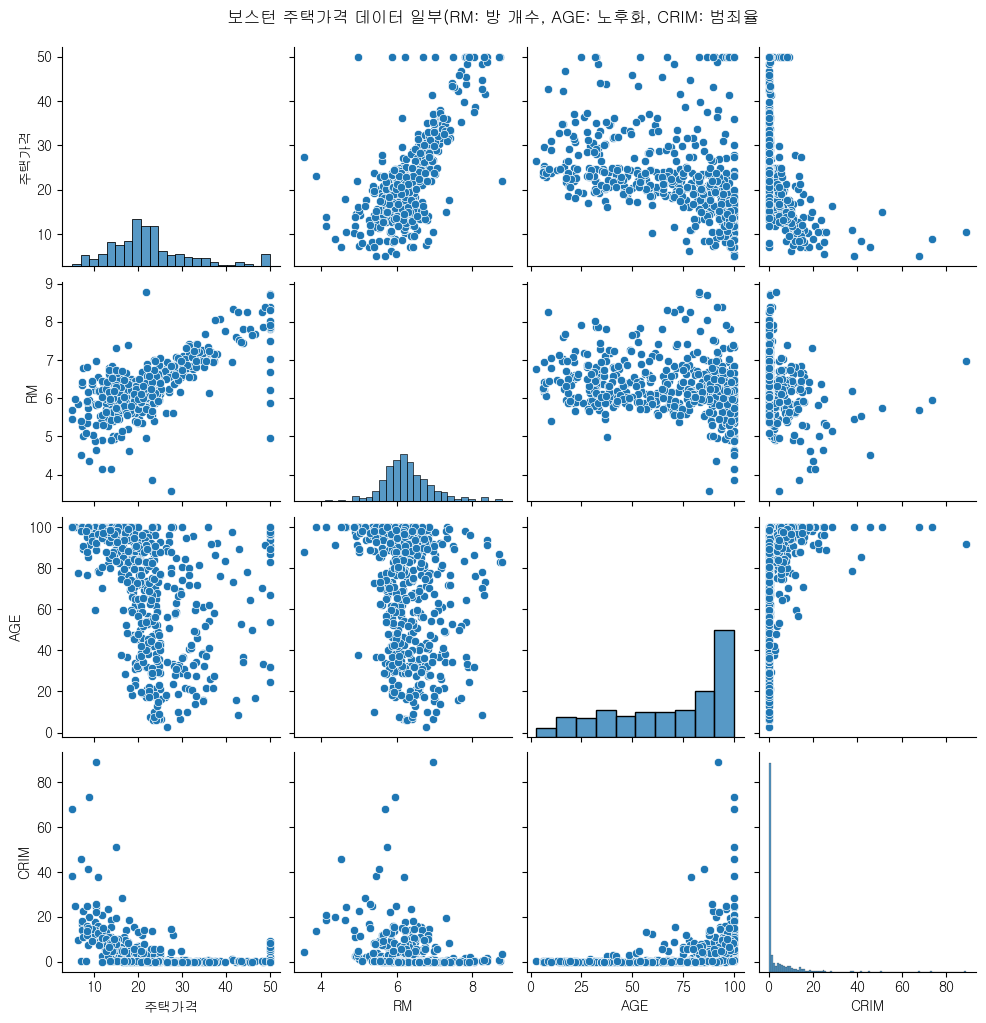

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['주택가격'] = boston.target
g = sns.pairplot(df[['주택가격', 'RM', 'AGE', 'CRIM']])
g.fig.suptitle("보스턴 주택가격 데이터 일부(RM: 방 개수, AGE: 노후화, CRIM: 범죄율", y=1.02)
plt.show()

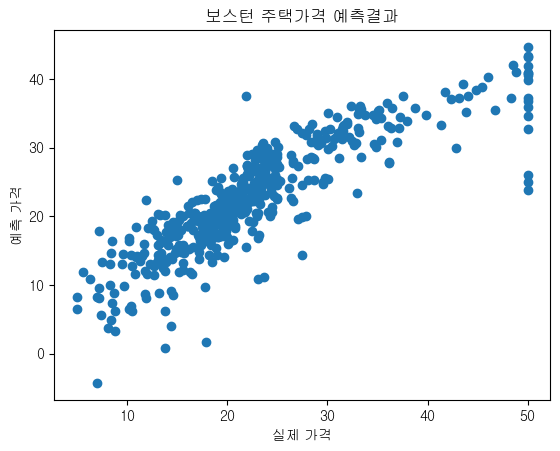

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(boston.data, boston.target)
predicted = model.predict(boston.data)
plt.scatter(boston.target, predicted)
plt.xlabel('실제 가격')
plt.ylabel('예측 가격')
plt.title('보스턴 주택가격 예측결과')
plt.show()

#### RMSE

In [9]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(boston.target, predicted, squared=False)
RMSE

4.679191295697282

#### 분류
붓꽃의 꽃받침 길이, 꽃받침 폭, 꽃잎 길이, 꽃잎 폭을 이용하여 붓꽃의 세가지 종류 중 어느 것에 속하는지 결정

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

np.random.seed(0)
df.sample(frac=1).reset_index(drop=True).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


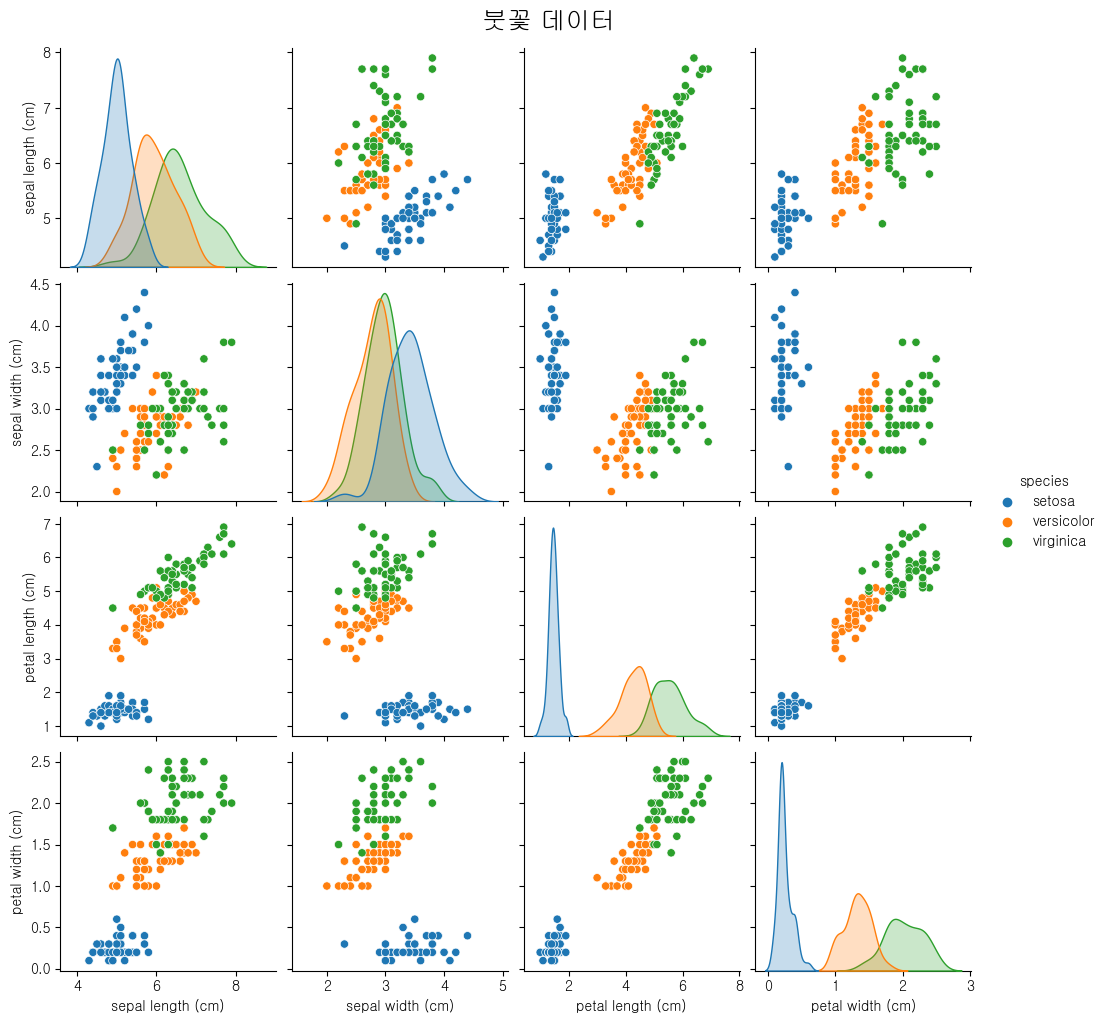

In [11]:
sns.pairplot(df, hue="species")
plt.suptitle("붓꽃 데이터", y=1.02, fontsize=18)
plt.show()

#### Support Vector Machine, SVM
분류모형 > 판별함수모형

머신러닝의 분야 중 하나로 패턴 인식, 자료분석을 위한 지도학습모델

분류와 회귀분석을 위해 사용

주어진 데이터 집합을 바탕으로 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델

선형 분류와 더불어 비선형 분류에도 사용

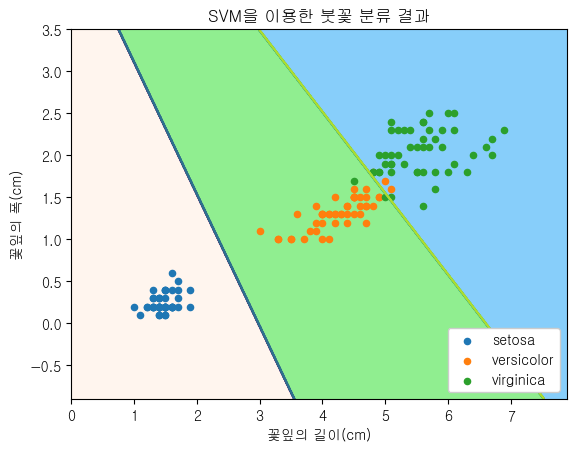

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

features = [2, 3]
X = iris.data[:, features]
y = iris.target

model = SVC(kernel="linear", random_state=0)
model.fit(X, y)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

cmap = mpl.colors.ListedColormap(['seashell', 'lightgreen', 'lightskyblue'])
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.contour(XX, YY, ZZ)
plt.scatter(X[y==0, 0], X[y==0, 1], s=20, label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], s=20, label=iris.target_names[1])
plt.scatter(X[y==2, 0], X[y==2, 1], s=20, label=iris.target_names[2])
plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.xlabel("꽃잎의 길이(cm)")
plt.ylabel("꽃잎의 폭(cm)")
plt.title("SVM을 이용한 붓꽃 분류 결과")
plt.legend(loc="lower right", framealpha=1)
plt.show()

#### 비지도학습(unsupervised learning)
입력/출력데이터를 구분짓지 않고 단순히 데이터를 입력하면 데이터들간의 규칙을 찾아내거나 미리 정한 규칙에 맞는 데이터인지 구분해낸다.

* Clustering

    데이터들을 유사한 데이터까지 같은 그룹으로 모으는 방법

    Affinity Propagation

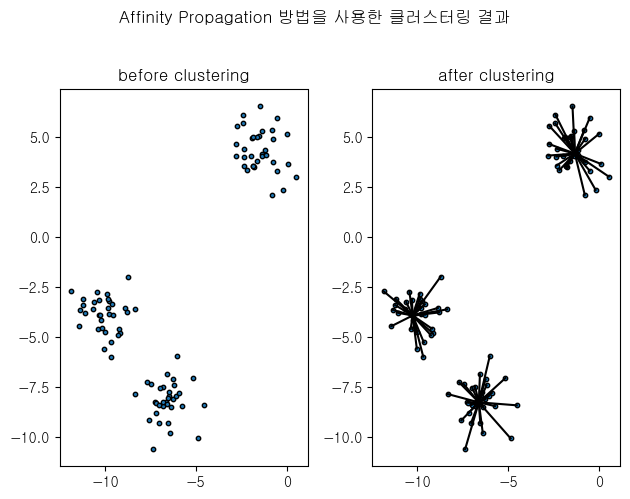

In [46]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

X, _ = make_blobs(n_features=2, centers=3, random_state=1)
model = AffinityPropagation().fit(X)

plt.subplot(121)
plt.scatter(X[:,0], X[:,1], marker='o', s=10, edgecolor='k')
plt.title('before clustering')
plt.subplot(122)
plt.scatter(X[:,0], X[:,1], marker='o', s=10, edgecolor='k')
plt.title('after clustering')
for k in range(3):
    cluster_center = X[model.cluster_centers_indices_[k]]
    for x in X[model.labels_ == k]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], c='k')
plt.suptitle("Affinity Propagation 방법을 사용한 클러스터링 결과", y=1.03)
plt.tight_layout()
plt.show()